# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 43


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
cities[:5]

['hasaki', 'faratsiho', 'airai', 'mataura', 'korla']

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define variables
units = 'imperial'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" +  weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Call function to recalculate maximum temperature to farenheight
       # convert_temp(city_max_temp)
       # city_max_temp = int(max_tempF)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | faratsiho
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | korla
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ijaki
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | cayenne
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22

In [4]:
# confirm the request results
city_weather.items()

dict_items([('coord', {'lon': 41.9211, 'lat': 64.2956}), ('weather', [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}]), ('base', 'stations'), ('main', {'temp': 23.29, 'feels_like': 14.83, 'temp_min': 23.29, 'temp_max': 23.29, 'pressure': 1024, 'humidity': 95, 'sea_level': 1024, 'grnd_level': 1023}), ('visibility', 10000), ('wind', {'speed': 7.2, 'deg': 226, 'gust': 26.75}), ('clouds', {'all': 41}), ('dt', 1675881860), ('sys', {'country': 'RU', 'sunrise': 1675834421, 'sunset': 1675862360}), ('timezone', 10800), ('id', 533418), ('name', 'Lukovetskiy'), ('cod', 200)])

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          38
Lat           38
Lng           38
Max Temp      38
Humidity      38
Cloudiness    38
Wind Speed    38
Country       38
Date          38
dtype: int64

In [25]:
city_data_df.sample(n=5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
34,saint george,37.1041,-113.5841,49.95,43,0,1.99,US,1675881847
27,bluff,-46.6000,168.3333,48.79,62,89,24.74,NZ,1675881826
35,caraz,-9.0486,-77.8100,68.99,70,100,5.53,PE,1675881858
13,lompoc,34.6391,-120.4579,67.84,60,0,3.44,US,1675881351
37,lukovetskiy,64.2956,41.9211,23.29,95,41,7.20,RU,1675881860


In [27]:
city_data_df['Lat'][:5]

City_ID
0    35.7333
1   -19.4000
2    -8.9266
3   -46.1927
4    41.7597
Name: Lat, dtype: float64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,41.40,51,2,18.84,JP,1675881841
1,faratsiho,-19.4000,46.9500,59.14,95,100,4.27,MG,1675881842
2,airai,-8.9266,125.4092,59.65,96,97,1.48,TL,1675881800
3,mataura,-46.1927,168.8643,48.47,91,98,6.89,NZ,1675881818
4,korla,41.7597,86.1469,30.16,63,18,2.08,CN,1675881843


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.info()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,41.40,51,2,18.84,JP,1675881841
1,faratsiho,-19.4000,46.9500,59.14,95,100,4.27,MG,1675881842
2,airai,-8.9266,125.4092,59.65,96,97,1.48,TL,1675881800
3,mataura,-46.1927,168.8643,48.47,91,98,6.89,NZ,1675881818
4,korla,41.7597,86.1469,30.16,63,18,2.08,CN,1675881843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

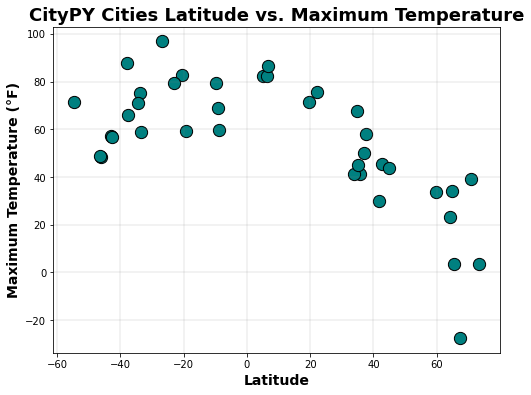

In [9]:
# Build scatter plot for latitude vs. temperature
fig1 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig1.set_title('CityPY Cities Latitude vs. Maximum Temperature', fontsize=18, weight='bold')
fig1.set_xlabel('Latitude', fontsize=14, weight='bold')
fig1.set_ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')
fig1.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

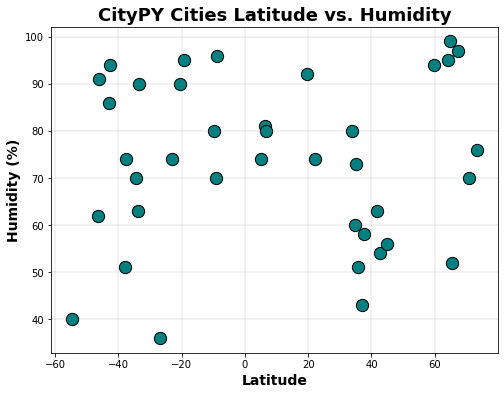

In [10]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Humidity',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig2.set_title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')
fig2.set_xlabel('Latitude', fontsize=14, weight='bold')
fig2.set_ylabel('Humidity (%)', fontsize=14, weight='bold')
fig2.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

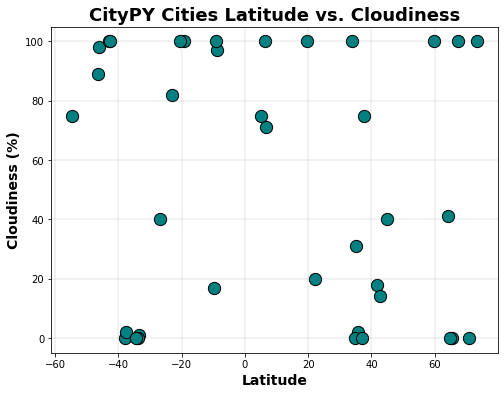

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Cloudiness',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# Incorporate the other graph properties
fig3.set_title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')
fig3.set_xlabel('Latitude', fontsize=14, weight='bold')
fig3.set_ylabel('Cloudiness (%)', fontsize=14, weight='bold')
fig3.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

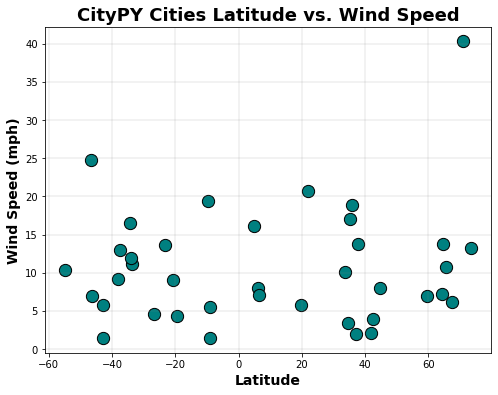

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig4 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Wind Speed',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig4.set_title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')
fig4.set_xlabel('Latitude', fontsize=14, weight='bold')
fig4.set_ylabel('Wind Speed (mph)', fontsize=14, weight='bold')
fig4.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation coefficient between Latitude and Maximum Temperature is -0.67
The r-value is: 0.44861854964108694


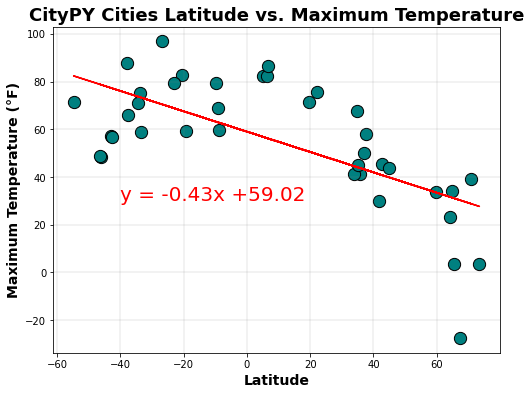

In [76]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
#fig5, ax5 = plt.subplots(figsize=(8,6))
plt.subplots(figsize=(8,6))
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
print(f"The correlation coefficient between Latitude and Maximum Temperature is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Maximum Temperature (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, (-40,30), fontsize=20,color="red")

mytitle = 'CityPY Cities Latitude vs. Maximum Temperature'
# set title, labels, and present the data
plt.title(mytitle, fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig5.png")

# present the data
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

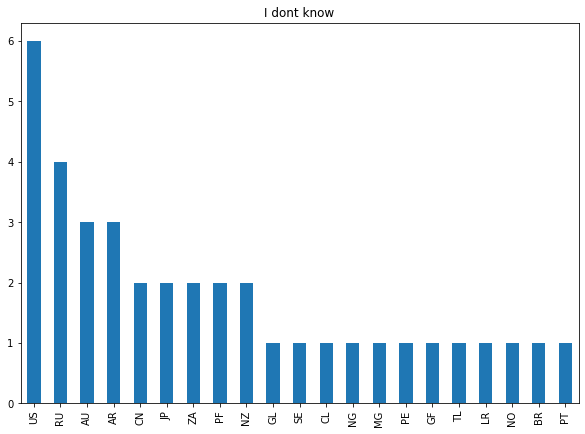

In [82]:
city_data_df['Country'].value_counts().plot.bar(figsize=(10,7))
plt.title('I dont know')
plt.show()

In [61]:
'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

'y = -0.43x +59.02'

The correlation coefficient between latitude and Humidity is 0.04
The r-value is: 0.001380824515842318


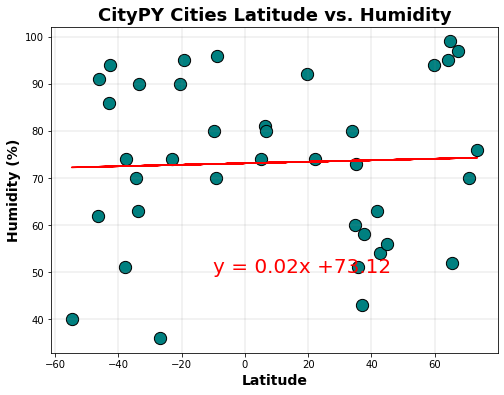

In [14]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig6, ax6 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
print(f"The correlation coefficient between latitude and Humidity is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Humidity (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(-10,50), xytext=(-10,50), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Humidity (%)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig6.png")

# present the data
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

The correlation coefficient between Latitude and Cloudiness is -0.17
The r-value is: 0.028929192846299696


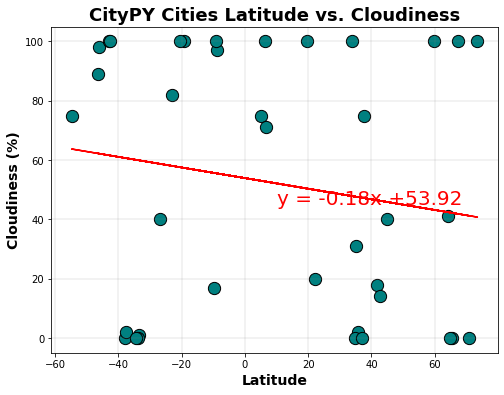

In [15]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig7, ax7 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
print(f"The correlation coefficient between Latitude and Cloudiness is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Cloudiness (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Cloudiness (%)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig7.png")

# present the data
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

The correlation coefficient between Latitude and Wind Speed is 0.11
The r-value is: 0.012809758632322341


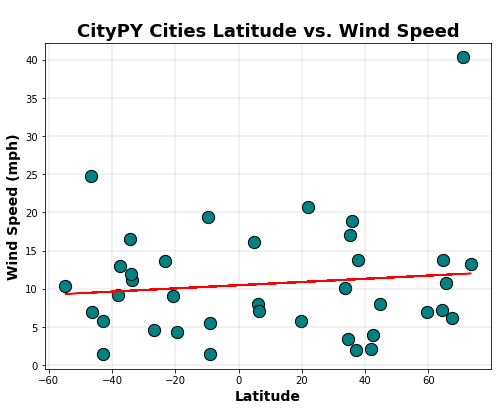

In [16]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig8, ax8 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig8.png")

# present the data
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,41.40,51,2,18.84,JP,1675881841
4,korla,41.7597,86.1469,30.16,63,18,2.08,CN,1675881843
6,berlevag,70.8578,29.0864,39.20,70,0,40.29,NO,1675881845
7,albany,42.6001,-73.9662,45.36,54,14,4.00,US,1675881700
9,nikolskoye,59.7035,30.7861,33.80,94,100,7.00,RU,1675881845


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,faratsiho,-19.4000,46.9500,59.14,95,100,4.27,MG,1675881842
2,airai,-8.9266,125.4092,59.65,96,97,1.48,TL,1675881800
3,mataura,-46.1927,168.8643,48.47,91,98,6.89,NZ,1675881818
5,atuona,-9.8000,-139.0333,79.20,80,17,19.42,PF,1675881843
8,mar del plata,-38.0023,-57.5575,87.84,51,0,9.22,AR,1675881824


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# y_tests = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# m = y_tests[1]
# m

# hemi = f'hemispheres[0]_hemi_df'
# x_values = hemi['Lat']
# x_values
hemispheres = ['northern', 'southern']

#hemi = f'{hemispheres[0]}_hemi_
hemi = hemispheres[1] + '_hemi_df'
hemi

The correlation coefficient between Latitude and Max Temp is -0.87. The r-value is: 0.75.
The correlation coefficient between Latitude and Humidity is 0.12. The r-value is: 0.01.
The correlation coefficient between Latitude and Cloudiness is -0.21. The r-value is: 0.04.
The correlation coefficient between Latitude and Wind Speed is 0.18. The r-value is: 0.03.


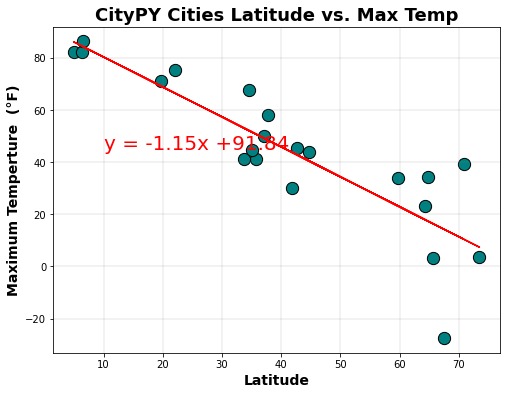

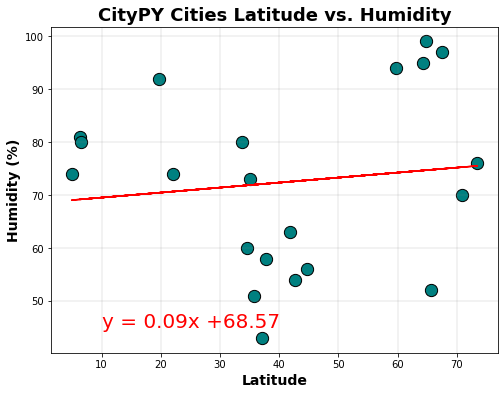

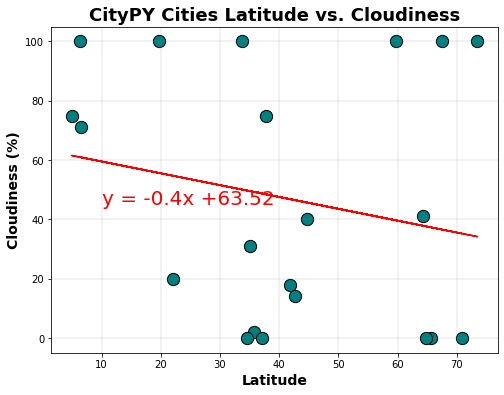

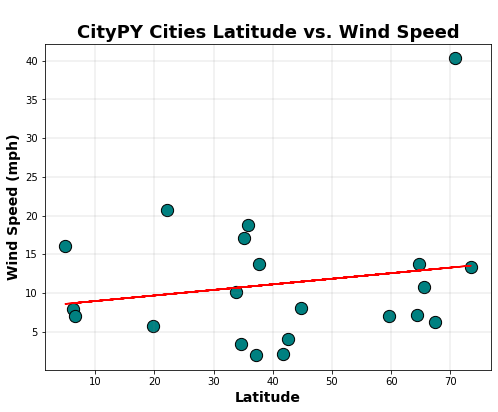

The correlation coefficient between Latitude and Max Temp is 0.32. The r-value is: 0.1.
The correlation coefficient between Latitude and Humidity is 0.3. The r-value is: 0.09.
The correlation coefficient between Latitude and Cloudiness is 0.07. The r-value is: 0.01.
The correlation coefficient between Latitude and Wind Speed is -0.17. The r-value is: 0.03.


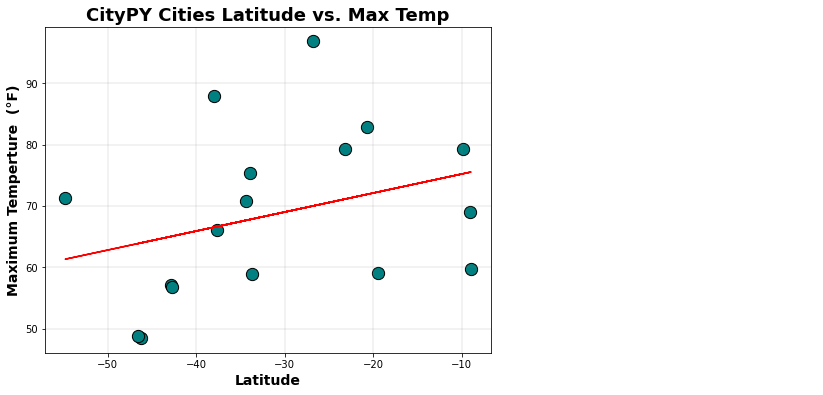

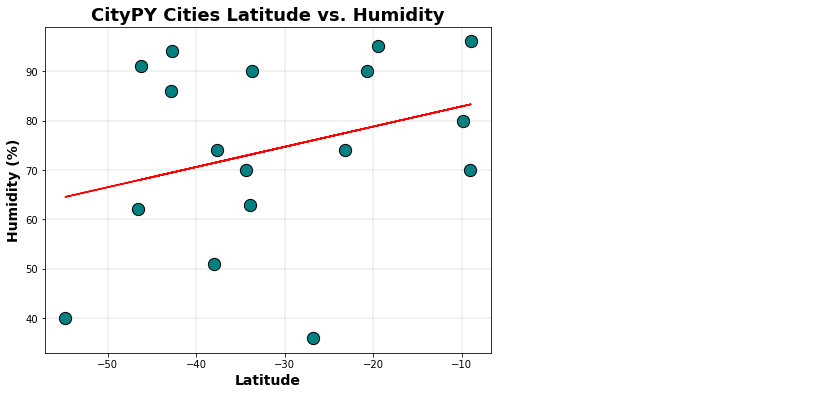

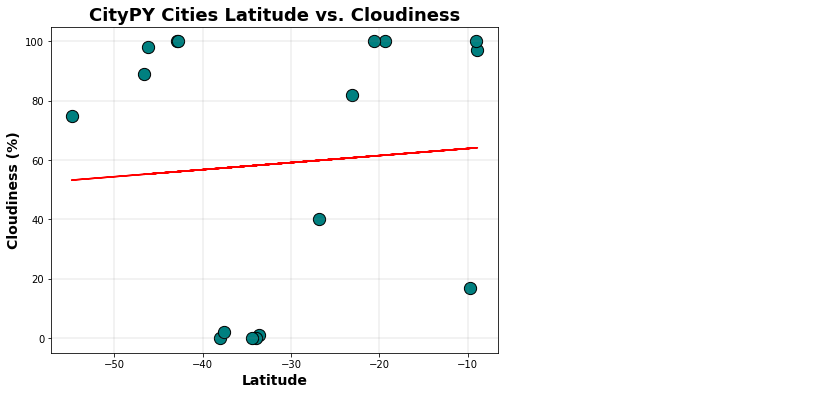

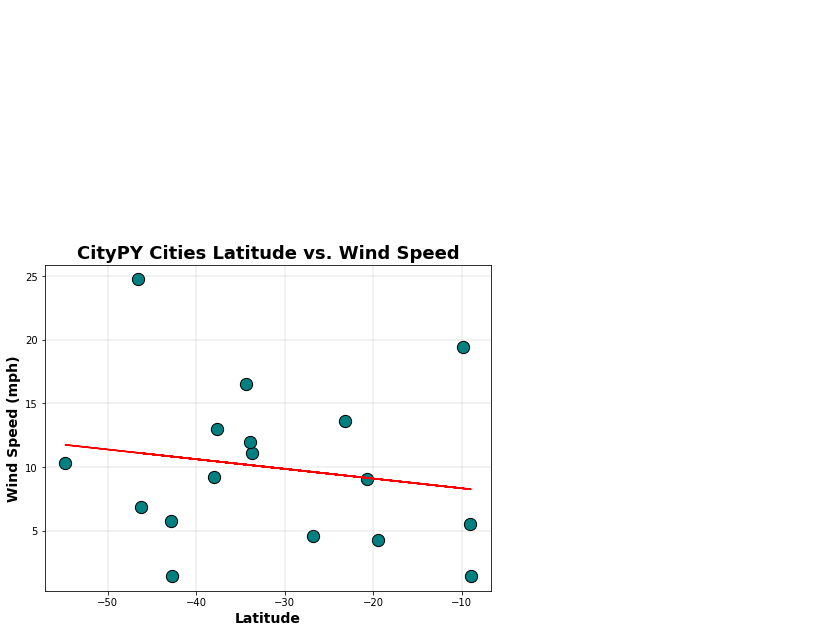

In [85]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
# for the Northern Hemisphere
hemispheres = [northern_hemi_df, southern_hemi_df]
y_tests = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
y_labels = ['Maximum Temperture  (°F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

h=0
i = 0  # criteria location in list
for sphere in hemispheres:    
    i = 0
    for test in y_tests:
        plt.subplots(figsize=(8,6))
        
        # assign hemisphere for processing
        x_values = sphere['Lat'] # all y values compared with Latitude
        y_values = sphere[test]


        # for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values =x_values * slope + intercept

        slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

        #print the r-value and correlation coefficient
        print(f'The correlation coefficient between Latitude and {test} is {round(st.pearsonr(x_values, y_values)[0],2)}. The r-value is: {round(rvalue**2,2)}.')
        
        # plot details, add annotation, add chart features
        plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
        plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line
        
        # overlay the slope intercept (y=mx+b)
        plt.annotate(slope_intercept, (10,45), fontsize=20,color="red")

        # set title, labels, and present the data
        plt.title(f'CityPY Cities Latitude vs. {test}', fontsize=18, weight='bold')           
        plt.xlabel('Latitude', fontsize=14, weight='bold')
        plt.ylabel(y_labels[i], fontsize=14, weight='bold')

    #     # print r value
    #     print(f'The r-value is: {rvalue**2}')

        # Save the figure
        plt.savefig("output_data/Fig8.png")

        # present the data
        plt.grid(color='gray', linestyle='-', linewidth=0.2)
        # loop through all four criteria
        i +=1
    # loop through both hemisphere DataFrames
    h += 1
    # present the data    
    plt.show()

In [84]:
for i in range(len(y_labels)):
    print(i)

0
1
2
3


In [ ]:
# Linear regression on Northern Hemisphere

fig9, ax9 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# present the data
plt.grid(True)
plt.show()
j = 10    # number figure to avoid plotting confusion
x_value = northern_hemi_df.loc[northern_hemi_df['Lat']]
y_value = northern_hemi_df.loc[northern_hemi_df['Max Temp']]
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot

create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()
#x_value, y_value, j

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
plot_title = 'Wind Speed vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE